# Capítulo 7 — Aplicações Industriais
### Parte 2 — Casos práticos e análises avançadas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 12.4 MB/s eta 0:00:00


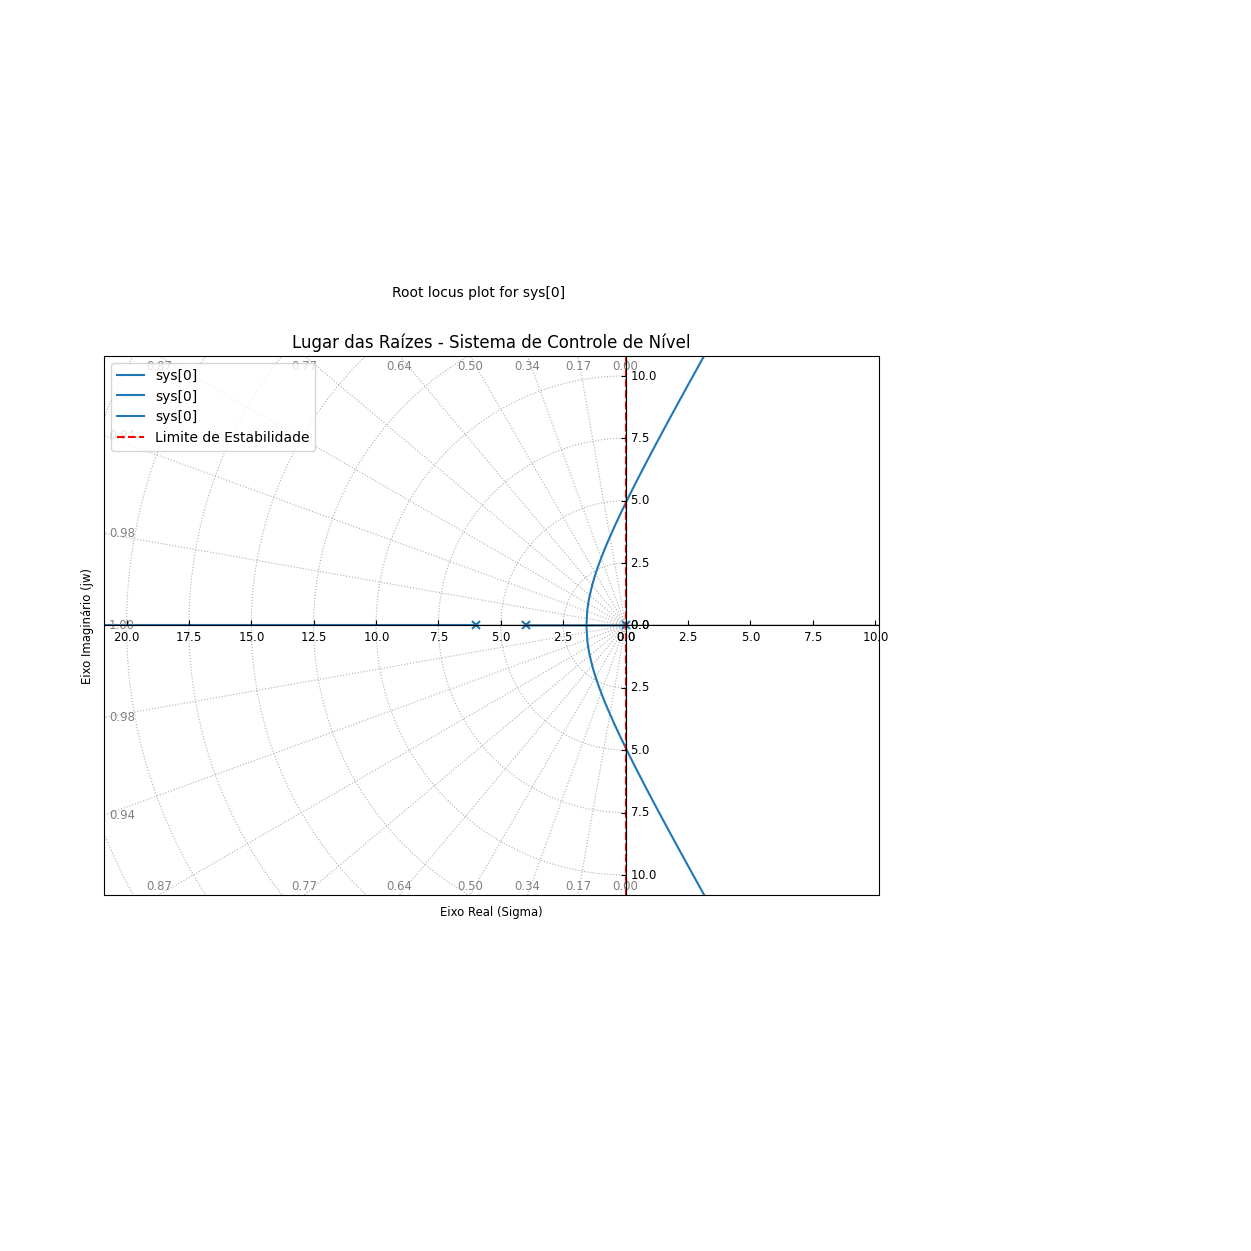

In [5]:
# Célula Corrigida para o Google Colab

# 1. Instalação e Importação
!pip install control
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# 2. Definição do Modelo
num = [1]
den = [1, 10, 24, 0]
sistema = ct.tf(num, den)

# 3. Plotagem do Lugar das Raízes
plt.figure(figsize=(10, 7))

# --- CORREÇÃO AQUI ---
# Removemos "rlist, klist =" pois queremos apenas ver o gráfico
ct.root_locus(sistema, grid=True)
# ---------------------

plt.title("Lugar das Raízes - Sistema de Controle de Nível")
plt.xlabel("Eixo Real (Sigma)")
plt.ylabel("Eixo Imaginário (jw)")
plt.axvline(x=0, color='r', linestyle='--', label='Limite de Estabilidade')
plt.legend()
plt.show()


Como podemos observar, se aumentar muito o ganho $K$, dois ramos cruzarão para o lado direito do gráfico. Isso prova que um simples controlador proporcional (P) tem um limite máximo de ganho antes de fazer o tanque transbordar ou oscilar violentamente.

# Comparação P vs. PI (Adicionando um Zero)

Na indústria, o controlador Proporcional (P) muitas vezes deixa um "erro de regime" (o nível do tanque nunca chega exatamente no setpoint). O controlador PI resolve isso adicionando um zero e um polo na origem.

Neste exemplo, veremos como a adição do Zero do PI "puxa" o lugar das raízes para a esquerda, aumentando a estabilidade.

/usr/local/lib/python3.12/dist-packages/control/pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
/tmp/ipython-input-4033908249.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


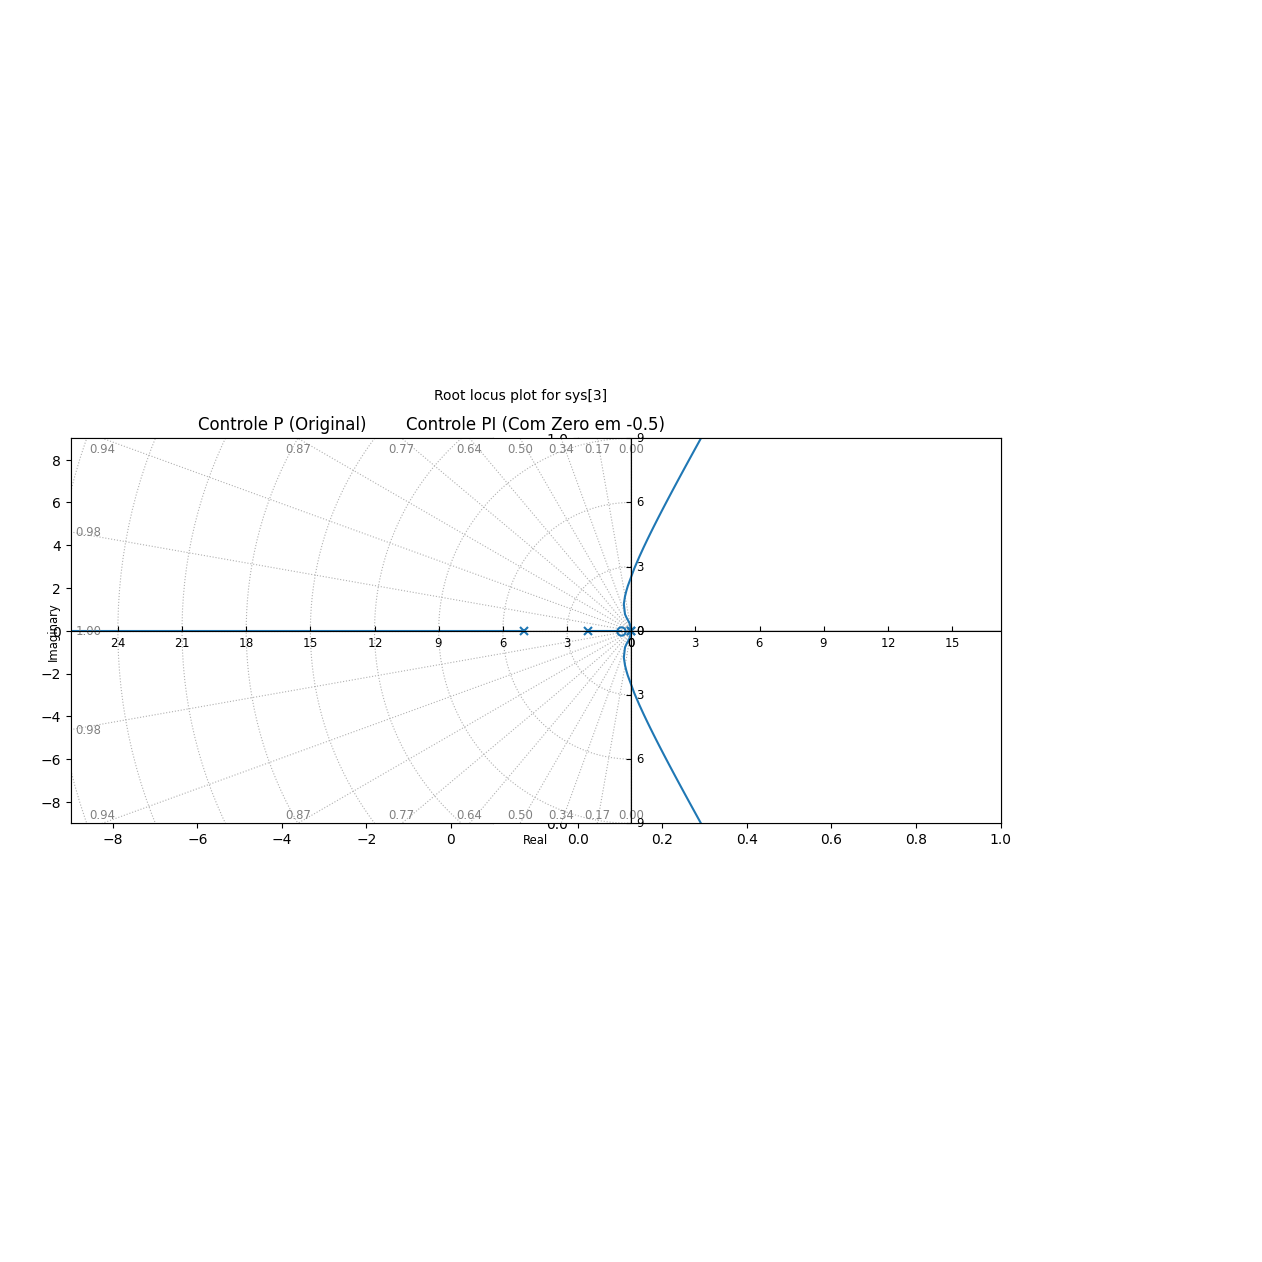

In [6]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# 1. Sistema Original (Instável com ganho alto)
# G(s) = 1 / [s(s+2)(s+5)]
sys = ct.tf([1], [1, 7, 10, 0])

# 2. Criando um Controlador PI
# PI(s) = Kp + Ki/s = (Kp*s + Ki)/s = K * (s + z) / s
# Vamos fixar o zero em -0.5 (z = 0.5)
# O "s" no denominador é o polo na origem do integrador
comp_pi = ct.tf([1, 0.5], [1, 0]) # (s + 0.5) / s

# Sistema em Malha Aberta com PI
sys_pi = sys * comp_pi

# 3. Plotando Comparação
plt.figure(figsize=(12, 5))

# Plot 1: Apenas Controle P
plt.subplot(1, 2, 1)
ct.root_locus(sys, grid=True)
plt.title("Controle P (Original)")

# Plot 2: Controle PI
plt.subplot(1, 2, 2)
ct.root_locus(sys_pi, grid=True)
plt.title("Controle PI (Com Zero em -0.5)")

plt.tight_layout()
plt.show()

Percebemos que o gráfico da direita (PI) muda a curvatura dos ramos. O zero adicionado "atrai" as raízes, permitindo, em alguns casos, ganhos maiores sem instabilidade.

# Compensador por Avanço de Fase (Lead Compensator)

Se você precisa que um braço robótico reponda mais rápido (menor tempo de subida), você precisa mover as raízes para a esquerda. Um compensador por avanço faz isso.

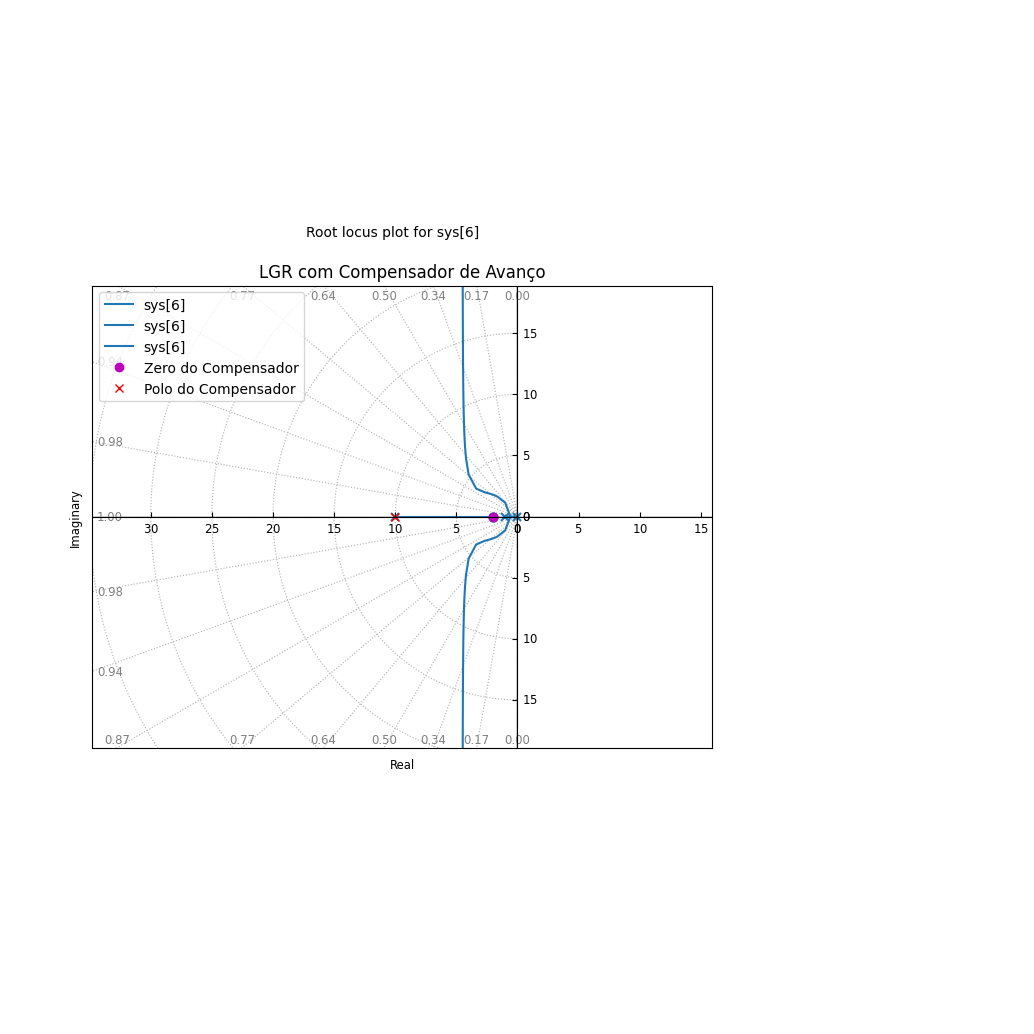

In [8]:
# Função de transferência de um motor DC simples
# G(s) = 1 / (s * (s + 1))
motor = ct.tf([1], [1, 1, 0])

# Compensador de Avanço (Lead)
# Adiciona um zero próximo à origem e um polo distante
# C(s) = (s + 2) / (s + 10)
compensador = ct.tf([1, 2], [1, 10])

sistema_compensado = motor * compensador

plt.figure(figsize=(8, 6))
# Apenas gera o gráfico (sem atribuir variáveis)
ct.root_locus(sistema_compensado, grid=True)

plt.title("LGR com Compensador de Avanço")
# Marcando o zero e o polo do compensador para visualização
plt.plot([-2], [0], 'mo', label='Zero do Compensador')
plt.plot([-10], [0], 'rx', label='Polo do Compensador')
plt.legend()
plt.show()

# Sistema com Atraso de Transporte (Aproximação de Padé)

Na indústria de processos (química, petróleo), o fluido demora para chegar do tanque até o sensor. Esse tempo morto (Dead Time) é o maior inimigo da estabilidade.
O LGR clássico não lida com atrasos ($e^{-sT}$), então usamos a Aproximação de Padé para convertê-lo em polos e zeros e analisar a estabilidade.

Aproximação de Padé do Atraso: <TransferFunction>: sys[8]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  -s + 2
  ------
  s + 2


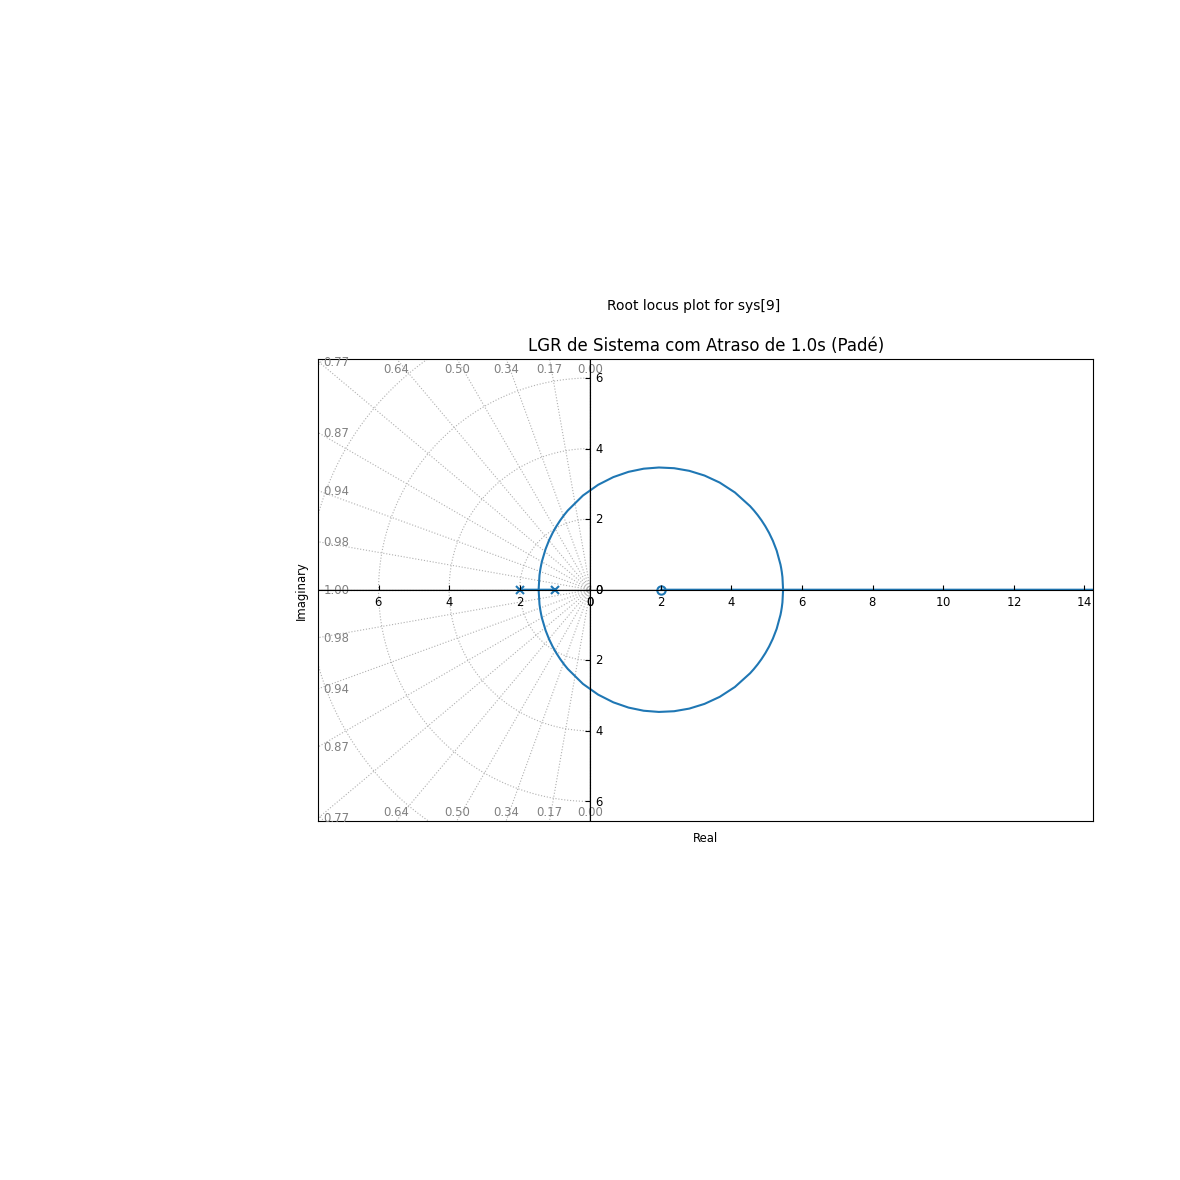

In [9]:
# Sistema de Processo com Atraso
# G(s) = K / (s + 1)  com atraso de 1 segundo
G_processo = ct.tf([1], [1, 1])

# Criando a aproximação de Padé para o atraso (Delay = 1s)
# Isso transforma o atraso em uma função racional
delay_time = 1.0
num_pade, den_pade = ct.pade(delay_time, n=1) # n=1 é a ordem da aproximação
delay_sys = ct.tf(num_pade, den_pade)

print(f"Aproximação de Padé do Atraso: {delay_sys}")

# Sistema Total (Planta * Atraso)
sys_com_atraso = G_processo * delay_sys

plt.figure(figsize=(10, 6))
ct.root_locus(sys_com_atraso, grid=True)
plt.title(f"LGR de Sistema com Atraso de {delay_time}s (Padé)")
plt.show()